# Dataverse Hack

#Insurance Claim Prediction

##Problem Statement

CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the highest claim settlement ratio. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.


As it's a fast growing startup, the company would like to optimize the cost of the insurance by identifying the policyholders who are more likely to claim in the next 6 months. 

Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months. The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.




In [1]:
import numpy as np          # importing important lib 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train_qWM28Yl.csv')  # reading the training dataset 

In [3]:
df.info() #info for each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [4]:
df.shape # so there is 44 columns

(58592, 44)

In [5]:
df.describe()  # statistics behind the dataset

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


# we can drop policy_id

# policy_tenure : The policy tenure can be any period ranging from 1 year to 100 years or whole life

#age_of_car: range b/w 0 to 1

#age_of_policyholder : .28 to 1

#area_cluster : area of clester

#population_density : Population density of the city (Policyholder City) range 290 to 73430

#make :Encoded Manufacturer/company of the car total 5 company are there 

#segment : Segment of the car (A/ B1/ B2/ C1/ C2)

#model:Encoded name of the car

#fuel_type: Type of fuel used by the car 3 types

#max_torque: Maximum Torque generated by the car (Nm@rpm) An engine's power is the product of force and the speed with which this force acts. Engine power and torque are both indicators that depend on the engine speed. A high torque enables efficient and energy-saving driving. A high engine power enables a car to accelerate quickly and reach a high top speed.

#max_power : Maximum Power generated by the car (bhp@rpm)

#engine_type: diff type of engine

#airbags : Number of airbags installed in the car we can drop this

#is_esc : Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not. ESC is designed to automatically help stabilize your car when it detects a momentary loss of control

#is_adjustable_steering : steering wheel of the car is adjustable or not. hold the steering wheel of their vehicle are less likely to have an accident and will be able to use their vehicle more efficiently

#is_tpms: Boolean flag indicating whether Tyre Pressure Monitoring System (TPMS) is present in the car or not.

#is_parking_sensors:parking sensors are present in the car or not.

#is_parking_camera :Boolean flag indicating whether the parking camera is present in the car or not.

#rear_brakes_type:Type of brakes used in the rear of the car

#displacement:Engine displacement of the car (cc)  not that important

#cylinder : Number of cylinders present in the engine of the car 3 to 4 not that important

#transmission_type:Transmission type of the car. manual or auto  not that important

#gear_box : Number of gears in the car  not that important

#steering_type : Type of the power steering present in the car  Power steering in cars helps to adjust the steering speed based on road conditions.

#turning_radius : The space a vehicle needs to make a certain turn (Meters) 4.5 to 5.2

#length: Length of the car (Millimetre)

#width:width of car

#height:height of car

#gross_weight:The maximum allowable weight of the fully-loaded car, including passengers, cargo and equipment (Kg)

#is_front_fog_lights: Boolean flag indicating whether front fog lights are available in the car or not.

#is_rear_window_wiper:  rear window wiper

#is_rear_window_washer:Boolean flag indicating whether the rear window washer is available in the car or not.

#is_rear_window_defogger:Boolean flag indicating whether rear window defogger is available in the car or not.

#is_brake_assist: Boolean flag indicating whether the brake assistance feature is available in the car or not.

#is_power_door_lock:Boolean flag indicating whether a power door lock is available in the car or not.

#is_central_locking:Boolean flag indicating whether the central locking feature is available in the car or not.

#is_power_steering : Boolean flag indicating whether power steering is available in the car or not.

#is_driver_seat_height_adjustable:Boolean flag indicating whether the height of the driver seat is adjustable or not.

#is_day_night_rear_view_mirror : Boolean flag indicating whether day & night rearview mirror is present in the car or not.

#is_ecw :Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not.

#is_speed_alert:Boolean flag indicating whether the speed alert system is available in the car or not.

#ncap_rating:Safety rating given by NCAP (out of 5)

#is_claim:Outcome: Boolean flag indicating whether the policyholder file a claim in the next 6 months or not.




In [6]:
df.isnull().sum()  #check the null value

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

so there is no null value present in our dataset

In [7]:
df_obj=df.select_dtypes(['object']) # selecting categorial data

In [8]:
df_obj # obj of dataframe

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,ID00001,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
1,ID00002,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
2,ID00003,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
3,ID00004,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,ID00005,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,C8,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
58588,ID58589,C14,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58589,ID58590,C5,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58590,ID58591,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


## EDA AND FE 

In [9]:
df1=df.copy() # to save original data

In [10]:
#area_cluster

df1['area_cluster'].value_counts()

C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64

In [11]:
#segment

df1['segment'].value_counts() 

B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64

In [12]:
df1.replace({"A": 6, "B2":5 ,"B1":4, "C1":3 , "C2":2,"Utility":1}, inplace = True) # label encoding


In [13]:
df1['segment'].value_counts() 

5    18314
6    17321
2    14018
4     4173
3     3557
1     1209
Name: segment, dtype: int64

In [14]:
df_obj

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,ID00001,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
1,ID00002,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
2,ID00003,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
3,ID00004,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,ID00005,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,C8,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
58588,ID58589,C14,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58589,ID58590,C5,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58590,ID58591,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [15]:
df1['model'].value_counts()

M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64

In [16]:
 df1['model'] = df1['model'].str.replace('M','') # replace M with space

In [17]:
df1['model'].value_counts() # label encoding of models

1     14948
4     14018
6     13776
8      4173
7      2940
3      2373
9      2114
5      1598
10     1209
2      1080
11      363
Name: model, dtype: int64

In [18]:
#fuel_type

df1['fuel_type'].value_counts()


Petrol    20532
CNG       20330
Diesel    17730
Name: fuel_type, dtype: int64

In [19]:
df1.replace({"Petrol": 0,"CNG":1,"Diesel":2}, inplace = True) # label encoding 

we can also drop this one becoz no insurance claims depend on it

In [20]:
df1['fuel_type'] # we can drop this column

0        1
1        1
2        1
3        0
4        0
        ..
58587    0
58588    1
58589    1
58590    0
58591    2
Name: fuel_type, Length: 58592, dtype: int64

In [21]:
#engine_type

df1['engine_type'].value_counts() #your regular comprehensive insurance will not cover the repair or replacement of engine

F8D Petrol Engine            14948
1.5 L U2 CRDi                14018
K Series Dual jet            13776
K10C                          4173
1.2 L K Series Engine         2940
1.0 SCe                       2373
i-DTEC                        2114
1.5 Turbocharged Revotorq     1598
G12B                          1209
1.2 L K12N Dualjet            1080
1.5 Turbocharged Revotron      363
Name: engine_type, dtype: int64

In [22]:
#is_esc

df1['is_esc'].value_counts()

No     40191
Yes    18401
Name: is_esc, dtype: int64

In [23]:
df1.replace({"No": 0, "Yes":1}, inplace = True) # label encoding for all classifier data 

In [24]:
df1['is_esc'].value_counts()

0    40191
1    18401
Name: is_esc, dtype: int64

In [25]:
#is_adjustable_steering

df1['is_adjustable_steering'].value_counts()

1    35526
0    23066
Name: is_adjustable_steering, dtype: int64

In [26]:
df1

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,3,4990,1,6,1,1,...,0,0,0,1,0,0,0,1,0,0
1,ID00002,0.672619,0.02,0.375000,2,27003,1,6,1,1,...,0,0,0,1,0,0,0,1,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,6,1,1,...,0,0,0,1,0,0,0,1,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,3,2,0,...,1,1,1,1,1,1,1,1,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,6,3,0,...,0,1,1,1,0,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,6,3,0,...,0,1,1,1,0,1,1,1,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,6,1,1,...,0,0,0,1,0,0,0,1,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,6,1,1,...,0,0,0,1,0,0,0,1,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,5,6,0,...,1,1,1,1,1,1,1,1,2,0


In [27]:
df1_obj=df1.select_dtypes(['object']) # selecting categorial data

In [28]:
df1_obj

,policy_id,area_cluster,model,max_torque,max_power,engine_type,rear_brakes_type,transmission_type,steering_type
0,ID00001,3,1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
1,ID00002,2,1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
2,ID00003,C3,1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
3,ID00004,C4,2,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Drum,Automatic,Electric
4,ID00005,C5,3,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,Drum,Automatic,Electric
...,...,...,...,...,...,...,...,...,...
58587,ID58588,C8,3,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,Drum,Automatic,Electric
58588,ID58589,C14,1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
58589,ID58590,C5,1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
58590,ID58591,C8,6,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,Drum,Manual,Electric


In [29]:
#rear_brakes_type

df1['rear_brakes_type'].value_counts()

Drum    44574
Disc    14018
Name: rear_brakes_type, dtype: int64

Disc brakes are the more effective and reliable choice, but they have their limitations. Drum brakes are not very practical

In [30]:
df1.replace({"Drum": 0, "Disc":1}, inplace = True)

In [31]:
df1['rear_brakes_type'].value_counts()

0    44574
1    14018
Name: rear_brakes_type, dtype: int64

#transmission_type 

we can drop this feature becoz it irrelavant to target feature

In [32]:
df1.drop('transmission_type',inplace=True,axis=1) #we can drop this feature becoz it irrelavant to target feature

In [33]:
df1['steering_type'].value_counts()

Power       33502
Electric    23881
Manual       1209
Name: steering_type, dtype: int64

In [34]:
df1.replace({"Manual": 0, "Power":1,'Electric':2 }, inplace = True) # label encoding

In [35]:
df1['steering_type'].value_counts()

1    33502
2    23881
0     1209
Name: steering_type, dtype: int64

In [36]:
df1_obj

,policy_id,area_cluster,model,max_torque,max_power,engine_type,rear_brakes_type,transmission_type,steering_type
0,ID00001,3,1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
1,ID00002,2,1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
2,ID00003,C3,1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
3,ID00004,C4,2,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Drum,Automatic,Electric
4,ID00005,C5,3,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,Drum,Automatic,Electric
...,...,...,...,...,...,...,...,...,...
58587,ID58588,C8,3,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,Drum,Automatic,Electric
58588,ID58589,C14,1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
58589,ID58590,C5,1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
58590,ID58591,C8,6,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,Drum,Manual,Electric


In [37]:
#engine_type

df["engine_type"].value_counts()

F8D Petrol Engine            14948
1.5 L U2 CRDi                14018
K Series Dual jet            13776
K10C                          4173
1.2 L K Series Engine         2940
1.0 SCe                       2373
i-DTEC                        2114
1.5 Turbocharged Revotorq     1598
G12B                          1209
1.2 L K12N Dualjet            1080
1.5 Turbocharged Revotron      363
Name: engine_type, dtype: int64

In [38]:
df1.drop('engine_type',inplace=True,axis=1) #we can drop this feature becoz it irrelavant to target feature

In [39]:
#policy_id
df1.drop('policy_id',inplace=True,axis=1) #we can drop this feature becoz it irrelavant to target feature

In [40]:
#area_cluster
df1['area_cluster'].value_counts() 

C8     13654
2       7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
3       1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64

In [41]:
df1.drop('area_cluster',inplace=True,axis=1) #we can drop this feature becoz it irrelavant to target feature

In [42]:
df1=df1.astype({"model": int}) # change the model datatype because it was as obj_type

In [43]:
#max_torque & max_power

#Power = torque x speed

#so we can drop one of them

df1.drop('max_torque',inplace=True,axis=1) #we can drop this feature becoz it irrelavant to target feature

In [44]:
df2=df1.copy()

In [45]:
#max_power
df1[['Power_bhp', 'Power_rpm']] = df1['max_power'].str.split('@', n=1, expand=True) # derive the new 2 column

In [46]:
df1.drop('max_power',inplace=True,axis=1) # droping becoz we derive

In [47]:
df1 # new dataset

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,airbags,is_esc,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Power_bhp,Power_rpm
0,0.515874,0.05,0.644231,4990,1,6,1,1,2,0,...,0,1,0,0,0,1,0,0,40.36bhp,6000rpm
1,0.672619,0.02,0.375000,27003,1,6,1,1,2,0,...,0,1,0,0,0,1,0,0,40.36bhp,6000rpm
2,0.841110,0.02,0.384615,4076,1,6,1,1,2,0,...,0,1,0,0,0,1,0,0,40.36bhp,6000rpm
3,0.900277,0.11,0.432692,21622,1,3,2,0,2,1,...,1,1,1,1,1,1,2,0,88.50bhp,6000rpm
4,0.596403,0.11,0.634615,34738,2,6,3,0,2,0,...,1,1,0,1,1,1,2,0,67.06bhp,5500rpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,2,6,3,0,2,0,...,1,1,0,1,1,1,2,0,67.06bhp,5500rpm
58588,1.199642,0.02,0.519231,7788,1,6,1,1,2,0,...,0,1,0,0,0,1,0,0,40.36bhp,6000rpm
58589,1.162273,0.05,0.451923,34738,1,6,1,1,2,0,...,0,1,0,0,0,1,0,0,40.36bhp,6000rpm
58590,1.236307,0.14,0.557692,8794,1,5,6,0,2,0,...,1,1,1,1,1,1,2,0,88.50bhp,6000rpm


In [48]:
 df1['Power_bhp'] = df1['Power_bhp'].str.replace('bhp','') # replace bhp with space

In [49]:
 df1['Power_rpm'] = df1['Power_rpm'].str.replace('rpm','') # replace M with space

In [50]:
df1=df1.astype({"Power_bhp": float,"Power_rpm": int}) # change the model datatype because it was as obj_type

In [51]:
#airbags #displacement #cylinder #transmission_type #gear_box #length #width #height so BY domain knowledge we can drop this column becoz importance  of this file is not that important 

In [52]:
df1.drop(columns = ["airbags","displacement","cylinder","gear_box","length","width","height"],inplace=True,axis=1) #droping 

In [53]:
df1

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,is_esc,is_adjustable_steering,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Power_bhp,Power_rpm
0,0.515874,0.05,0.644231,4990,1,6,1,1,0,0,...,0,1,0,0,0,1,0,0,40.36,6000
1,0.672619,0.02,0.375000,27003,1,6,1,1,0,0,...,0,1,0,0,0,1,0,0,40.36,6000
2,0.841110,0.02,0.384615,4076,1,6,1,1,0,0,...,0,1,0,0,0,1,0,0,40.36,6000
3,0.900277,0.11,0.432692,21622,1,3,2,0,1,1,...,1,1,1,1,1,1,2,0,88.50,6000
4,0.596403,0.11,0.634615,34738,2,6,3,0,0,0,...,1,1,0,1,1,1,2,0,67.06,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,2,6,3,0,0,0,...,1,1,0,1,1,1,2,0,67.06,5500
58588,1.199642,0.02,0.519231,7788,1,6,1,1,0,0,...,0,1,0,0,0,1,0,0,40.36,6000
58589,1.162273,0.05,0.451923,34738,1,6,1,1,0,0,...,0,1,0,0,0,1,0,0,40.36,6000
58590,1.236307,0.14,0.557692,8794,1,5,6,0,0,1,...,1,1,1,1,1,1,2,0,88.50,6000


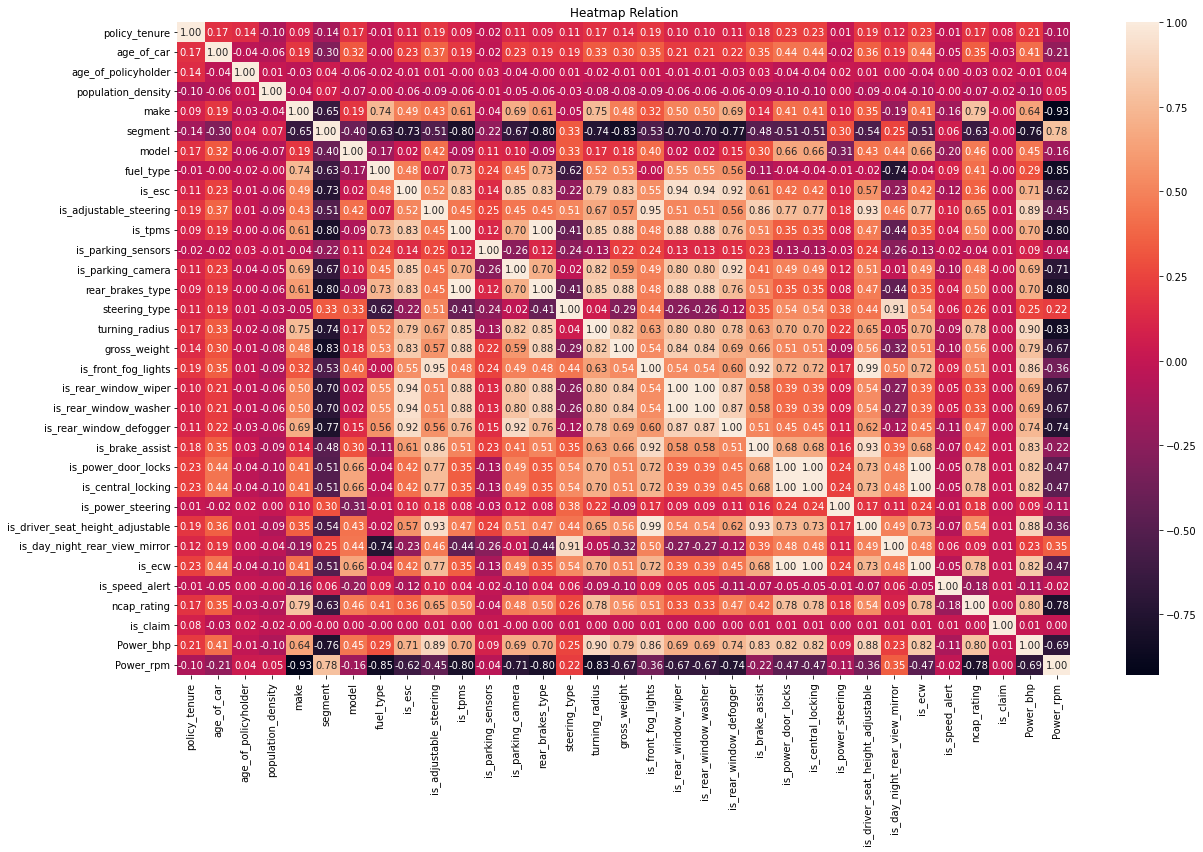

In [54]:
plt.figure(figsize=(20, 12))

plt.title("Heatmap Relation")

sns.heatmap(df1.corr(), annot=True, fmt='.2f');   # checking correlating b/w datasets

so by corr we can see is_central_locking and is_power_door_locks is highly correlated and fog light and driver seat height are high correlate 

In [55]:
df1.drop(columns = ["is_central_locking","is_driver_seat_height_adjustable","is_ecw","rear_brakes_type",'is_rear_window_washer',"is_adjustable_steering",'is_esc'],inplace=True,axis=1)

we can drop is_ecw and rear_brakes_type 

In [56]:
#df1.drop(columns = ["is_ecw","rear_brakes_type",'is_rear_window_washer'],inplace=True,axis=1)

In [57]:
#df1.drop(columns = ["is_adjustable_steering",'is_esc'],inplace=True,axis=1)

In [58]:
#df1

In [59]:
x=df1.drop(labels=['is_claim'],axis=1)  #Target and feature split
y=df1['is_claim']

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

from sklearn.preprocessing import StandardScaler, OneHotEncoder

import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [61]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()#LogisticRegression

In [62]:
from sklearn.model_selection import GridSearchCV  #HYperparameter

parameter={'C':[0.5,1,2,3,5,6,7,9,10],'penalty':['l1','l2','elasticnet']}
log_regressor=GridSearchCV(regression,parameter,scoring='accuracy',cv=5)

log_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [63]:
print(log_regressor.best_params_)

{'C': 0.5, 'penalty': 'l2'}


In [64]:
regression=LogisticRegression(penalty='l2',C=0.5)

In [65]:
#Splitting the data for sklearn methods
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [66]:
regression.fit(x_train,y_train)

LogisticRegression(C=0.5)

In [67]:
#LogisticRegression

accuracy={}
model = LogisticRegression()
model.fit(x_train, y_train)

train_pred = regression.predict(x_train)
test_pred = regression.predict(x_test)

print(classification_report(train_pred, y_train))
print('\nAccuracy Score for model1(training): ', accuracy_score(train_pred, y_train))

print(classification_report(test_pred, y_test))
print('\nAccuracy Score for model1(testing): ', accuracy_score(test_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     39256
           1       0.00      0.00      0.00         0

    accuracy                           0.94     39256
   macro avg       0.50      0.47      0.48     39256
weighted avg       1.00      0.94      0.97     39256


Accuracy Score for model1(training):  0.9371306297126554
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     19336
           1       0.00      0.00      0.00         0

    accuracy                           0.93     19336
   macro avg       0.50      0.47      0.48     19336
weighted avg       1.00      0.93      0.97     19336


Accuracy Score for model1(testing):  0.9338022341745966


In [388]:
import pickle
pickle.dump(regression, open('model50.pkl', 'wb'))
pickled_model = pickle.load(open('model50.pkl', 'rb'))

In [68]:
# SCALING

from sklearn.preprocessing import StandardScaler
train_scaler=StandardScaler()
test_scaler=StandardScaler()

In [69]:
scaled_train_data=train_scaler.fit_transform(x_train)
scaled_test_data=test_scaler.fit_transform(x_test)

In [70]:
scaled_train_df=pd.DataFrame(data=scaled_train_data, columns=x_train.columns, index=x_train.index)
scaled_test_df=pd.DataFrame(data=scaled_test_data, columns=x_test.columns, index=x_test.index)

In [71]:
#Over Sampling


from imblearn.over_sampling import RandomOverSampler
from collections import Counter
Counter(y_train)

Counter({0: 36788, 1: 2468})

In [72]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(scaled_train_df,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 36788, 1: 2468})
The number of classes after fit Counter({0: 36788, 1: 27591})


In [217]:
accuracy={}
model = LogisticRegression()
model.fit(X_train_ns,y_train_ns)

train_pred = model.predict(X_train_ns)
test_pred = model.predict(scaled_test_df)

#print(classification_report(train_pred, y_train))
#print('\nAccuracy Score for model1(training): ', accuracy_score(train_pred, y_train))

print(classification_report(test_pred, y_test))
print('\nAccuracy Score for model1(testing): ', accuracy_score(test_pred, y_test))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85     14822
           1       0.34      0.10      0.15      4514

    accuracy                           0.74     19336
   macro avg       0.56      0.52      0.50     19336
weighted avg       0.67      0.74      0.69     19336


Accuracy Score for model1(testing):  0.7449317335539926


In [81]:
catboost_base = CatBoostClassifier(verbose=False,random_state=0, scale_pos_weight=10)
cat=catboost_base.fit(X_train_ns,y_train_ns,eval_set=(scaled_test_data, scaled_test_df))

CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/private/libs/target/data_providers.cpp:612: Currently only multi-regression, multilabel and survival objectives work with multidimensional target

In [80]:
y_pred=.predict(scaled_test_df)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

NameError: name 'knn1' is not defined

In [77]:
from catboost import CatBoostClassifier

In [218]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [264]:
#KNN

param_grid = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12],
              'weights': ['uniform', 'distance']}
model = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
model = model.fit(X_train_ns,y_train_ns)

In [265]:
model.best_estimator_

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [266]:
knn=KNeighborsClassifier(n_neighbors=3, weights='distance')

In [267]:
knn1=knn.fit(X_train_ns,y_train_ns)

In [268]:
y_pred=knn1.predict(scaled_test_df)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16045  2011]
 [ 1098   182]]
0.8392118328506413
              precision    recall  f1-score   support

           0       0.94      0.89      0.91     18056
           1       0.08      0.14      0.10      1280

    accuracy                           0.84     19336
   macro avg       0.51      0.52      0.51     19336
weighted avg       0.88      0.84      0.86     19336



In [269]:
import pickle
pickle.dump(knn1, open('model3.pkl', 'wb'))#KNN
pickled_model = pickle.load(open('model3.pkl', 'rb'))

In [278]:
#ADABOOST

from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()

parameters = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
clf = GridSearchCV(ab_clf, parameters, cv=5, n_jobs=-1)
clf.fit(X_train_ns, y_train_ns)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [279]:
clf.best_estimator_

AdaBoostClassifier(n_estimators=9)

In [280]:
Ada=AdaBoostClassifier(n_estimators=9)

In [281]:
ada=Ada.fit(X_train_ns, y_train_ns)

In [282]:
y_pred=ada.predict(scaled_test_df)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[14068  3988]
 [  818   462]]
0.7514480761274307
              precision    recall  f1-score   support

           0       0.95      0.78      0.85     18056
           1       0.10      0.36      0.16      1280

    accuracy                           0.75     19336
   macro avg       0.52      0.57      0.51     19336
weighted avg       0.89      0.75      0.81     19336



In [283]:
import pickle
pickle.dump(ada, open('model4.pkl', 'wb'))#KNN
pickled_model = pickle.load(open('model4.pkl', 'rb'))

In [351]:
param_grid = { 
    'n_estimators': [50,75,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

In [352]:
CV_rfc = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 75, 200]})

In [399]:
CV_rfc.best_estimator_

RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=200)

In [838]:
rf=RandomForestClassifier(max_depth=8,max_features='auto',n_estimators=500,criterion="entropy")

In [839]:
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       n_estimators=500)

In [840]:
train_pred = rf.predict(x_train)
test_pred = rf.predict(x_test)

print(classification_report(train_pred, y_train))
print('\nAccuracy Score for model1(training): ', accuracy_score(train_pred, y_train))

print(classification_report(test_pred, y_test))
print('\nAccuracy Score for model1(testing): ', accuracy_score(test_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     39256
           1       0.00      0.00      0.00         0

    accuracy                           0.94     39256
   macro avg       0.50      0.47      0.48     39256
weighted avg       1.00      0.94      0.97     39256


Accuracy Score for model1(training):  0.9371306297126554
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     19336
           1       0.00      0.00      0.00         0

    accuracy                           0.93     19336
   macro avg       0.50      0.47      0.48     19336
weighted avg       1.00      0.93      0.97     19336


Accuracy Score for model1(testing):  0.9338022341745966


In [171]:
import xgboost as xgb

In [172]:
param_grid_xgboost = {

                "n_estimators": [50,100, 130],
                               "max_depth": range(3, 11, 1),
    "random_state":[0,50,100]
    

            }

# Creating an object of the Grid Search class
grid= GridSearchCV(xgb.XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=5)

In [173]:
grid.fit(X_train_ns,y_train_ns)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...t=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 11),
                         'n_estimators': [50, 100, 130],
                         'random_state': [0, 50, 100]},
             verbose=3)

In [174]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=130,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [175]:
xg_new=xgb.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=130,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [176]:
xgs=xg_new.fit(X_train_ns,y_train_ns)

In [177]:
y_pred=xgs.predict(scaled_test_df)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17149   907]
 [ 1191    89]]
0.8914977244517998
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     18056
           1       0.09      0.07      0.08      1280

    accuracy                           0.89     19336
   macro avg       0.51      0.51      0.51     19336
weighted avg       0.88      0.89      0.89     19336



In [841]:
import pickle
pickle.dump(rf, open('model11.pkl', 'wb'))#RandomForest
pickled_model = pickle.load(open('model11.pkl', 'rb'))

In [196]:
a=pd.DataFrame(a)

In [197]:
a.value_counts()

0    15836
1     3500
dtype: int64

In [92]:
df1

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,is_tpms,is_parking_sensors,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_power_steering,is_day_night_rear_view_mirror,is_speed_alert,ncap_rating,is_claim,Power_bhp,Power_rpm
0,0.515874,0.05,0.644231,4990,1,6,1,1,0,1,...,0,0,0,1,0,1,0,0,40.36,6000
1,0.672619,0.02,0.375000,27003,1,6,1,1,0,1,...,0,0,0,1,0,1,0,0,40.36,6000
2,0.841110,0.02,0.384615,4076,1,6,1,1,0,1,...,0,0,0,1,0,1,0,0,40.36,6000
3,0.900277,0.11,0.432692,21622,1,3,2,0,0,1,...,1,1,1,1,1,1,2,0,88.50,6000
4,0.596403,0.11,0.634615,34738,2,6,3,0,0,0,...,0,0,1,1,1,1,2,0,67.06,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,2,6,3,0,0,0,...,0,0,1,1,1,1,2,0,67.06,5500
58588,1.199642,0.02,0.519231,7788,1,6,1,1,0,1,...,0,0,0,1,0,1,0,0,40.36,6000
58589,1.162273,0.05,0.451923,34738,1,6,1,1,0,1,...,0,0,0,1,0,1,0,0,40.36,6000
58590,1.236307,0.14,0.557692,8794,1,5,6,0,0,1,...,0,1,1,1,1,1,2,0,88.50,6000


In [93]:
df1.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'steering_type',
       'turning_radius', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_power_steering',
       'is_day_night_rear_view_mirror', 'is_speed_alert', 'ncap_rating',
       'is_claim', 'Power_bhp', 'Power_rpm'],
      dtype='object')

# TEST DATA EDA

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df1=pd.read_csv('test_zo1G9sv.csv')

In [96]:
df1

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,ID97651,0.047982,0.15,0.740385,C2,27003,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
39059,ID97652,1.224838,0.05,0.509615,C8,8794,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
39060,ID97653,0.520287,0.12,0.355769,C6,13051,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0
39061,ID97654,1.172391,0.08,0.644231,C5,34738,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2


In [129]:
d=pd.read_csv('test_zo1G9sv.csv')

In [97]:
df1.replace({"A": 6, "B2":5 ,"B1":4, "C1":3 , "C2":2,"Utility":1}, inplace = True) # label encoding

In [98]:
 df1['model'] = df1['model'].str.replace('M','') # replace M with space

In [99]:
df1.replace({"Petrol": 0,"CNG":1,"Diesel":2}, inplace = True) # label encoding 

In [100]:
df1.replace({"No": 0, "Yes":1}, inplace = True) # label encoding for all classifier data 

In [101]:
df1.replace({"Drum": 0, "Disc":1}, inplace = True)

In [102]:
df1.drop('transmission_type',inplace=True,axis=1) #we can drop this feature becoz it irrelavant to target feature

In [103]:
df1.replace({"Manual": 0, "Power":1,'Electric':2 }, inplace = True)

In [104]:
df1.drop('engine_type',inplace=True,axis=1) #we can drop this feature becoz it irrelavant to target feature

In [105]:
df1.drop('policy_id',inplace=True,axis=1) #we can drop this feature becoz it irrelavant to target feature

In [106]:
df1.drop('area_cluster',inplace=True,axis=1) #we can drop this feature becoz it irrelavant to target feature

In [107]:
df1=df1.astype({"model": int}) # change the model datatype because it was as obj_type

In [108]:
df1.drop('max_torque',inplace=True,axis=1) #we can drop this feature becoz it irrelavant to target feature

In [109]:
df1[['Power_bhp', 'Power_rpm']] = df1['max_power'].str.split('@', n=1, expand=True) # derive the new 2 column

In [110]:
df1.drop('max_power',inplace=True,axis=1)

In [712]:
 df1['Power_bhp'] = df1['Power_bhp'].str.replace('bhp','') # replace bhp with space

In [112]:
 df1['Power_rpm'] = df1['Power_rpm'].str.replace('rpm','') # replace M with space

In [113]:
df1=df1.astype({"Power_bhp": float,"Power_rpm": int}) # change the model datatype because it was as obj_type

In [114]:
df1.drop(columns = ["airbags","displacement","cylinder","gear_box","length","width","height"],inplace=True,axis=1) 

In [115]:
df1.drop(columns = ["is_central_locking","is_driver_seat_height_adjustable"],inplace=True,axis=1)

In [116]:
df1.drop(columns = ["is_ecw","rear_brakes_type",'is_rear_window_washer'],inplace=True,axis=1)

In [117]:
df1.drop(columns = ["is_adjustable_steering",'is_esc'],inplace=True,axis=1)

In [118]:
df1

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,is_tpms,is_parking_sensors,...,is_rear_window_wiper,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_power_steering,is_day_night_rear_view_mirror,is_speed_alert,ncap_rating,Power_bhp,Power_rpm
0,0.341732,0.00,0.586538,4076,1,6,1,1,0,1,...,0,0,0,0,1,0,1,0,40.36,6000
1,0.307241,0.13,0.442308,8794,1,5,6,0,0,1,...,0,0,1,1,1,1,1,2,88.50,6000
2,0.327924,0.12,0.451923,8794,2,6,3,0,0,0,...,0,0,0,1,1,1,1,2,67.06,5500
3,0.782654,0.01,0.461538,34738,1,6,1,1,0,1,...,0,0,0,0,1,0,1,0,40.36,6000
4,1.233404,0.02,0.634615,34738,1,6,1,1,0,1,...,0,0,0,0,1,0,1,0,40.36,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,0.047982,0.15,0.740385,27003,1,5,6,0,0,1,...,0,0,1,1,1,1,1,2,88.50,6000
39059,1.224838,0.05,0.509615,8794,3,2,4,2,1,1,...,1,1,1,1,1,0,1,3,113.45,4000
39060,0.520287,0.12,0.355769,13051,1,5,7,0,0,1,...,1,1,1,1,1,1,1,0,88.50,6000
39061,1.172391,0.08,0.644231,34738,1,3,2,0,0,1,...,0,1,1,1,1,1,1,2,88.50,6000


In [119]:
df1.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'steering_type',
       'turning_radius', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_power_steering',
       'is_day_night_rear_view_mirror', 'is_speed_alert', 'ncap_rating',
       'Power_bhp', 'Power_rpm'],
      dtype='object')

In [166]:
a

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [167]:
a=pd.DataFrame(a)

In [168]:
a

,0
0,0
1,0
2,0
3,0
4,0
...,...
39058,0
39059,0
39060,0
39061,0


In [ ]:
from sklearn.preprocessing import StandardScaler
test_scaler=StandardScaler()
scaled_test_data=test_scaler.fit_transform(df1)
scaled_test_df=pd.DataFrame(data=scaled_test_data, columns=df1.columns, index=df1.index)

In [842]:
pickled_model = pickle.load(open('model11.pkl', 'rb'))
a=pickled_model.predict(scaled_test_df)

In [843]:
a

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [844]:
a=pd.DataFrame(a)

In [845]:
a.value_counts()

0    31660
1     7403
dtype: int64

In [846]:
d=d[d.columns[0]]

In [847]:
d

0        ID58593
1        ID58594
2        ID58595
3        ID58596
4        ID58597
          ...   
39058    ID97651
39059    ID97652
39060    ID97653
39061    ID97654
39062    ID97655
Name: policy_id, Length: 39063, dtype: object

In [848]:
d=pd.DataFrame(d)

In [849]:
b=a.join(d)

In [850]:
b=d.join(a)

In [851]:
b

,policy_id,0
0,ID58593,1
1,ID58594,0
2,ID58595,0
3,ID58596,0
4,ID58597,0
...,...,...
39058,ID97651,0
39059,ID97652,1
39060,ID97653,0
39061,ID97654,0


In [852]:
b.rename(columns = {0:'is_claim'}, inplace = True)

In [853]:
b

,policy_id,is_claim
0,ID58593,1
1,ID58594,0
2,ID58595,0
3,ID58596,0
4,ID58597,0
...,...,...
39058,ID97651,0
39059,ID97652,1
39060,ID97653,0
39061,ID97654,0


In [854]:
b.to_csv('final_output.csv', index=False)

In [855]:
b['is_claim'].value_counts()

0    31660
1     7403
Name: is_claim, dtype: int64

In [856]:
df1

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,is_tpms,is_parking_sensors,...,is_rear_window_wiper,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_power_steering,is_day_night_rear_view_mirror,is_speed_alert,ncap_rating,Power_bhp,Power_rpm
0,0.341732,0.00,0.586538,4076,1,6,1,1,0,1,...,0,0,0,0,1,0,1,0,40.36,6000
1,0.307241,0.13,0.442308,8794,1,5,6,0,0,1,...,0,0,1,1,1,1,1,2,88.50,6000
2,0.327924,0.12,0.451923,8794,2,6,3,0,0,0,...,0,0,0,1,1,1,1,2,67.06,5500
3,0.782654,0.01,0.461538,34738,1,6,1,1,0,1,...,0,0,0,0,1,0,1,0,40.36,6000
4,1.233404,0.02,0.634615,34738,1,6,1,1,0,1,...,0,0,0,0,1,0,1,0,40.36,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,0.047982,0.15,0.740385,27003,1,5,6,0,0,1,...,0,0,1,1,1,1,1,2,88.50,6000
39059,1.224838,0.05,0.509615,8794,3,2,4,2,1,1,...,1,1,1,1,1,0,1,3,113.45,4000
39060,0.520287,0.12,0.355769,13051,1,5,7,0,0,1,...,1,1,1,1,1,1,1,0,88.50,6000
39061,1.172391,0.08,0.644231,34738,1,3,2,0,0,1,...,0,1,1,1,1,1,1,2,88.50,6000
